In [3]:
####################  Data Analysis & Calculation  #####################3
import numpy as np   
import pandas as pd  
import datetime  

####################  Visuvalization & plotting  #####################3
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline  
#################### Machine Learning #####################3
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import warnings  
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 
import xgboost as xgb
from xgboost.sklearn import XGBClassifier # Extrame GB
from xgboost import plot_importance ## Plotting Importance Variables 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder # Labeling the columns with 0 & 1


In [4]:
# Read the data in
employee = pd.read_csv(r"C:\Users\Arjun Walunj\Desktop\machine learning\Ensamble technique\churn (3).csv")

In [5]:
print ("Rows     : " ,employee.shape[0])
print ("Columns  : " ,employee.shape[1])


Rows     :  7043
Columns  :  21


In [6]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Missing Value

In [7]:
#Replacing spaces with null values in total charges column
employee['TotalCharges'] =employee["TotalCharges"].replace(" ",np.nan).astype(float) 
# string cannot be convert float direclty 

In [8]:
employee.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
employee.TotalCharges.fillna(employee.TotalCharges.mean(),inplace=True) # one column at a time bb

In [10]:
employee.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Removing Irrelavent Variable 

In [11]:
employee = employee.drop(['customerID'],axis=1)
employee.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
# #Employee Numeric columns
employee_num = employee[employee.select_dtypes(include=[np.number]).columns.tolist()]
employee_num.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15


In [13]:
employee_dummies = employee[employee.select_dtypes(include=['object']).columns.tolist()]
employee_dummies.head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [14]:
from sklearn.preprocessing import LabelEncoder
employee_dummies=employee_dummies.apply(LabelEncoder().fit_transform)
employee_dummies.head(3)
# label in ascending order

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1


In [15]:
employee_combined = pd.concat([employee_num, employee_dummies],axis=1)

employee_combined.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


# Data Partition-1

In [16]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
X = employee_combined.drop('Churn',axis=1)
y = employee_combined[["Churn"]]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

In [17]:
print('The number of samples into the Train data is {}.'.format(x_train.shape[0]))
print('The number of samples into the Test data is {}.'.format(x_test.shape[0]))

The number of samples into the Train data is 5634.
The number of samples into the Test data is 1409.


# Model -- Xg Boosting

In [18]:
# Define Model parameters to tune
model_parameters = { 
        'n_estimators':[50, 100, 200, 500],  # number of trees
        'max_depth': [3, 5, 10]}              # maximum number of branches in each tree 
        #'min_samples_leaf': [10,5,15]            # minimum number of Sample in each child node or leaf 
                  

In [19]:
# Gridsearch the parameters to find the best parameters. Using L2 penalty
model = XGBClassifier(reg_lambda=0)   # Lamda = 0 
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(x_train, y_train)  ## Model building

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [20]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'max_depth': 3, 'n_estimators': 50}


In [21]:
# Re-fit the model with the best parameters
final_mod = XGBClassifier(**gscv.best_params_)
final_mod.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [22]:
parent_params = {'shape':'box',
               'style':'filled,rounded',
                'fillcolor' :'#78cbec'}
child_params = {'shape':'box',
               'style':'filled',
                'fillcolor' :'#e48038'}

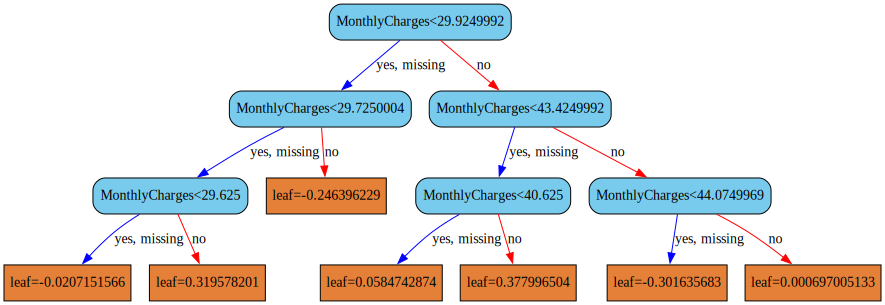

In [24]:
xgb.to_graphviz(final_mod,num_trees=49,size="5,5",   # Tree = 50 
               condition_node_params=parent_params,
               leaf_node_params=child_params)

Yhat = Initial Prediction + Learning rate * Average error0 + Learning rate * Average error2 + ... + Learning rate * Average error49 
yhat = 0.5               + 0.3           * -0.568063915   +        0.3    * -0.455574751    +  

# Accuracy of Train

In [25]:
train=pd.concat([x_train,y_train],axis=1)
train['Predicted']=final_mod.predict(x_train)  # MODEL = Final_mod
train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Predicted
1814,0,12,19.70,258.35,1,1,1,1,0,2,...,1,1,1,1,1,2,0,3,0,0
5946,0,42,73.90,3160.55,0,0,0,1,0,0,...,2,2,2,0,2,1,0,1,1,0
3881,0,71,65.15,4681.75,1,1,0,1,2,0,...,2,0,2,0,0,2,0,0,0,0
2389,0,71,85.45,6300.85,1,1,1,1,2,0,...,0,2,2,2,2,1,0,2,0,0
3676,0,30,70.40,2044.75,1,0,0,1,0,0,...,2,0,2,2,0,1,0,2,0,0


In [26]:
print('Classification report for train data is : \n',
      classification_report(y_train, train['Predicted']))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      4113
           1       0.72      0.58      0.64      1521

    accuracy                           0.83      5634
   macro avg       0.79      0.75      0.76      5634
weighted avg       0.82      0.83      0.82      5634



# Accuracy of Test

In [27]:
test=pd.concat([x_test,y_test],axis=1)
test['Predicted']=final_mod.predict(x_test)  # MODEL = Final_mod
test.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Predicted
3381,0,41,79.85,3320.75,0,0,0,1,0,0,...,0,2,2,2,2,1,1,0,0,0
6180,1,66,102.40,6471.85,0,0,0,1,2,1,...,0,0,0,2,2,2,1,0,0,0
4829,0,12,45.00,524.35,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3737,0,5,50.60,249.95,0,0,0,1,2,0,...,0,0,0,0,0,0,1,3,1,0
4249,0,10,65.90,660.05,0,1,1,1,0,0,...,2,2,0,0,2,1,1,3,0,0


In [28]:
print('Classification report for test data is : \n',
      classification_report(y_test, test['Predicted']))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1061
           1       0.62      0.57      0.59       348

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.80      0.81      0.80      1409



# Finished

# Importance Feature

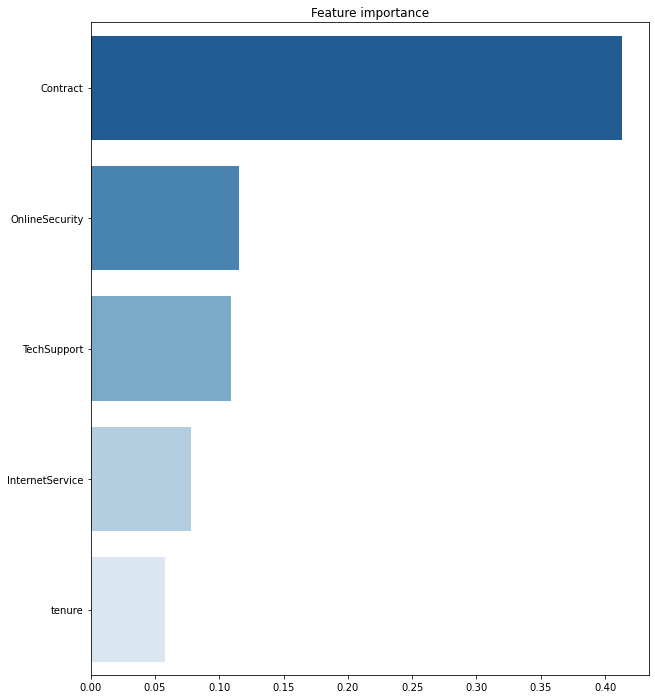

In [29]:
# Plot features importances
imp = pd.Series(data=final_mod.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')